In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    The raw code for this IPython notebook is by default hidden for easier reading.
    To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

![Weaver.jpg](img/Weaver.jpg)


### *Nobody likes to hear it, because it's dull, but the reason you win or lose is darn near always the same - pitching.*

~ Earl Weaver

![Hank.jpeg](img/Hank.jpeg)

### *Guessing what the pitcher is going to throw is 80% of being a successful hitter. The other 20% is just execution.*

~ Hank Aaron

# Pitching Trends (2015 - 2018)

In this analysis I analyze whether or not there are any staticially significant differences from year to year in major attributes (speed, spin rate, and break length) from three pitch types: 
- Four Seam Fastball
- Slider  
- Curveball 

This analysis is intended to provide insight to pitchers, batters, and front office management. Pitchers will want to see what the trends are in pitching overall so that they can either keep up or make a strategic decision to deviate from the trend since batters will try to adapt to the current trend. Managers will want to know what the trends are so that they can make better decisions on what batters to use to set their lineups and how to train their teams to address the current trends. General managers will want to use this analysis to better inform what pitchers and batters they should be looking at picking up and/or letting go. Lastly, batters will want to stay current on pitching trends so that they can adapt their training plans to focus on current pitching trends. 

In [2]:

pitches=pd.read_csv('/Users/steveangeli/Downloads/pitches.csv')


In [3]:
# Narrow down the selection of columns to those containing the information we want to analyze.

pitches = pitches[['start_speed', 'spin_rate', 'break_length', 'pitch_type', 'ab_id']]

# How I handled null values: There are about 14,000 NaN values, mainly in the start and end speed columns. 
# There are over 2,867,153 pitches so I feel comfortable dropping them.

pitches = pitches.dropna()
pitches.head()

# Strip the year information from the ab_id and create a year column so that I can disaggregate the data according to year.

year = []
for entry in pitches.ab_id:
  current = str(entry)
  current = current[0:4]
  year.append(current)

pitches['year'] = year

pitches = pitches[['start_speed', 'spin_rate', 'break_length', 'pitch_type', 'year']]

In [4]:
# Break the pitches into those thrown each year.

pitches_15 = pitches[pitches.year == '2015']
pitches_16 = pitches[pitches.year == '2016']
pitches_17 = pitches[pitches.year == '2017']
pitches_18 = pitches[pitches.year == '2018']

# Break the pitches into pitch types. 

pitches_ff = pitches[pitches.pitch_type == 'FF']
pitches_sl = pitches[pitches.pitch_type == 'SL']
pitches_cu = pitches[pitches.pitch_type == 'CU']

# Break the pitches according to year and type. 

pitches_15_ff = pitches_15[pitches_15.pitch_type == 'FF']
pitches_16_ff = pitches_16[pitches_16.pitch_type == 'FF']
pitches_17_ff = pitches_17[pitches_17.pitch_type == 'FF']
pitches_18_ff = pitches_18[pitches_18.pitch_type == 'FF']

pitches_15_sl = pitches_15[pitches_15.pitch_type == 'SL']
pitches_16_sl = pitches_16[pitches_16.pitch_type == 'SL']
pitches_17_sl = pitches_17[pitches_17.pitch_type == 'SL']
pitches_18_sl = pitches_18[pitches_18.pitch_type == 'SL']

pitches_15_cu = pitches_15[pitches_15.pitch_type == 'CU']
pitches_16_cu = pitches_16[pitches_16.pitch_type == 'CU']
pitches_17_cu = pitches_17[pitches_17.pitch_type == 'CU']
pitches_18_cu = pitches_18[pitches_18.pitch_type == 'CU']

## The Fastball (2015 - 2018)

![FourSeam.jpg](img/FourSeam.jpg)

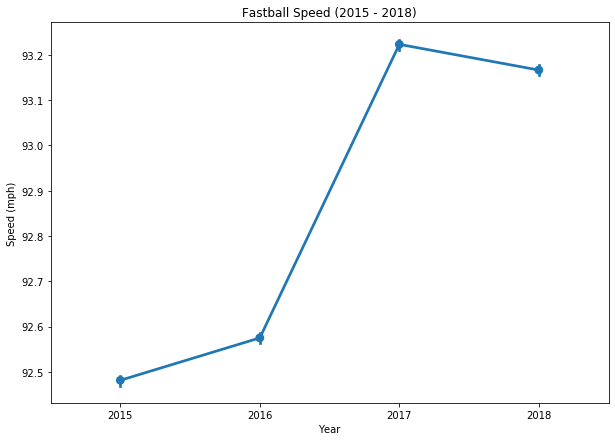

In [5]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="start_speed", data=pitches_ff)
plt.title("Fastball Speed (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Speed (mph)')
plt.show()

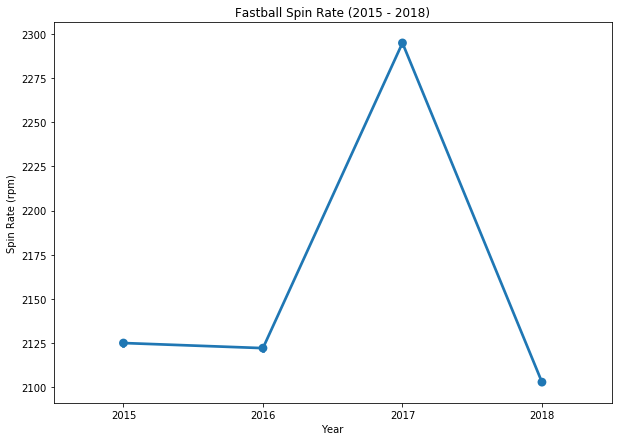

In [6]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="spin_rate", data=pitches_ff)
plt.title("Fastball Spin Rate (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Spin Rate (rpm)')
plt.show()

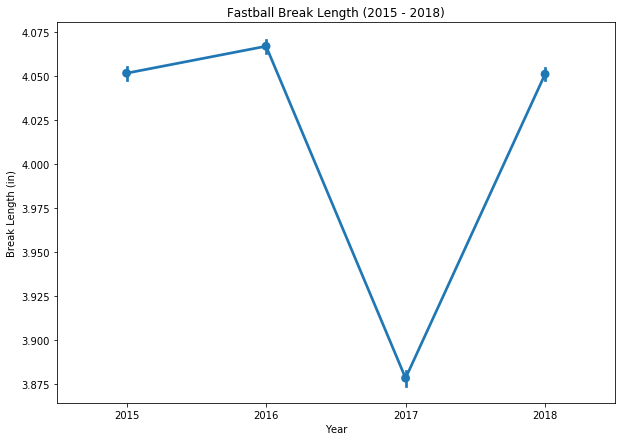

In [7]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="break_length", data=pitches_ff)
plt.title("Fastball Break Length (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Break Length (in)')
plt.show()

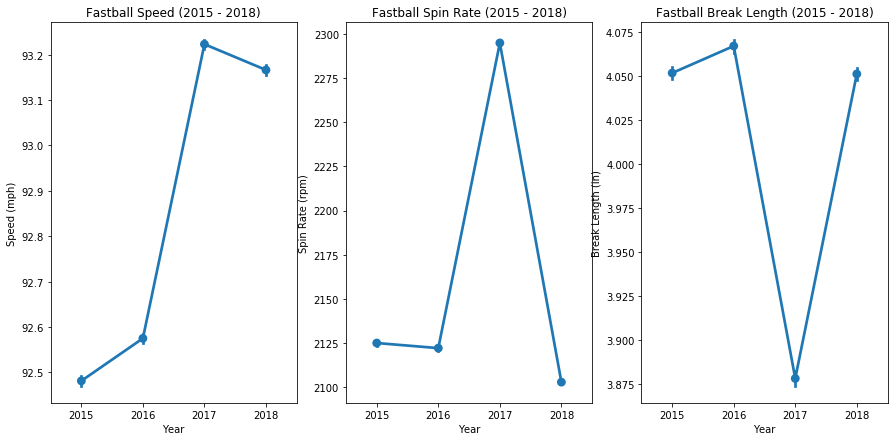

In [8]:
plt.subplots(figsize = (15,7))

plt.subplot(1, 3, 1)
sns.pointplot(x="year", y="start_speed", data=pitches_ff)
plt.title("Fastball Speed (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Speed (mph)')

plt.subplot(1, 3, 2)
sns.pointplot(x="year", y="spin_rate", data=pitches_ff)
plt.title("Fastball Spin Rate (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Spin Rate (rpm)')

plt.subplot(1, 3, 3)
sns.pointplot(x="year", y="break_length", data=pitches_ff)
plt.title("Fastball Break Length (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Break Length (in)')

plt.show()

## Four Seam Fastball Conclusion: 

The fastball has evolved a lot in the past 4 years. It saw a dramatic increase in both speed (.75 MPH) and spin rate in 2017, but had less overall movement (.2 inches). Then in 2018 pitchers figured out how to keep its speed up and get back the movement lost in 2017.

## The Slider (2015 - 2018)

![Slider.jpg](img/Slider.jpg)

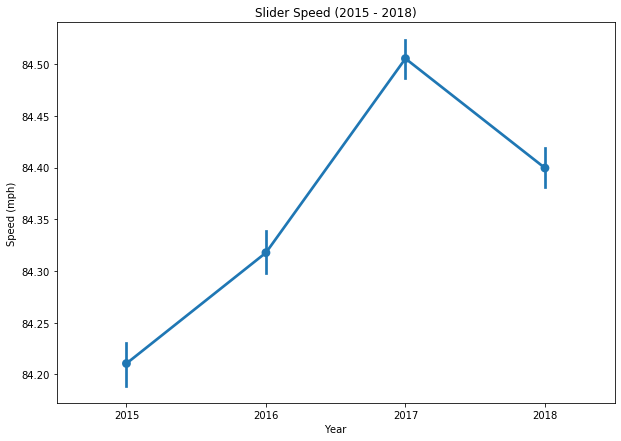

In [9]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="start_speed", data=pitches_sl)
plt.title("Slider Speed (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Speed (mph)')
plt.show()

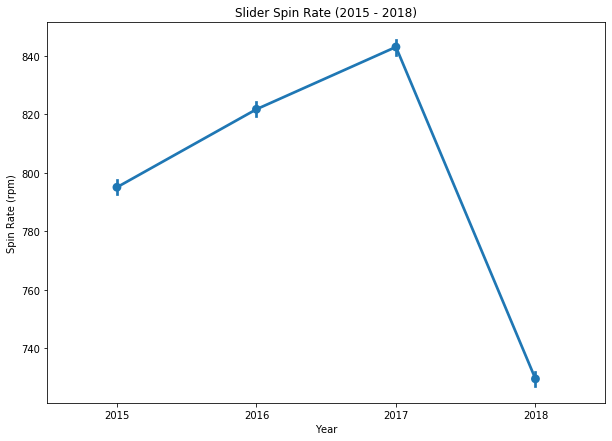

In [10]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="spin_rate", data=pitches_sl)
plt.title("Slider Spin Rate (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Spin Rate (rpm)')
plt.show()



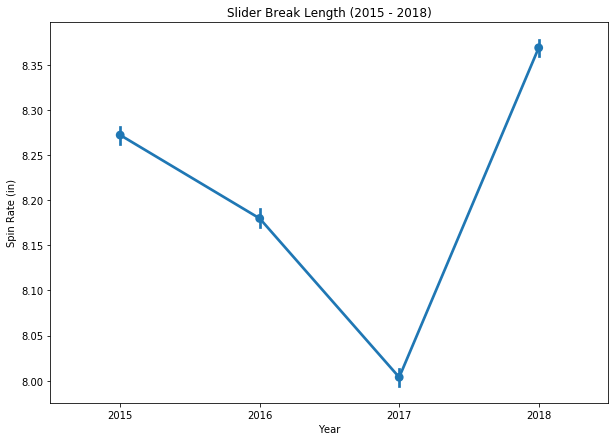

In [11]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="break_length", data=pitches_sl)
plt.title("Slider Break Length (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Spin Rate (in)')
plt.show()

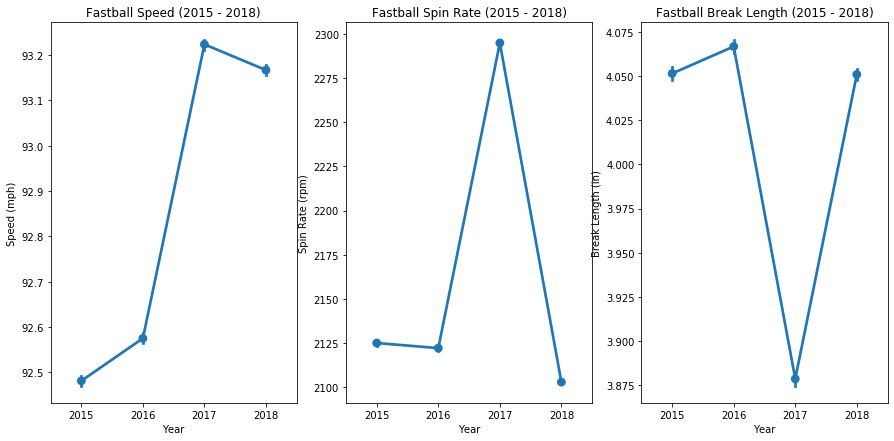

In [12]:
plt.figure(figsize = (15,7))

plt.subplot(1, 3, 1)
sns.pointplot(x="year", y="start_speed", data=pitches_ff)
plt.title("Fastball Speed (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Speed (mph)')

plt.subplot(1, 3, 2)
sns.pointplot(x="year", y="spin_rate", data=pitches_ff)
plt.title("Fastball Spin Rate (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Spin Rate (rpm)')

plt.subplot(1, 3, 3)
sns.pointplot(x="year", y="break_length", data=pitches_ff)
plt.title("Fastball Break Length (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Break Length (in)')

plt.show()

## Slider Conclusion: 

The speed of the slider has been increasing over the past serveral seasons accompanied by a decrease in the overall  break length. In 2018 though while nearly maintaining its speed gains the spin rate dropped over 100 RPMs and the break length increased by over .35 inches. 

## The Curveball (2015 - 2018)

![Curveball.jpg](img/Curveball.jpg)

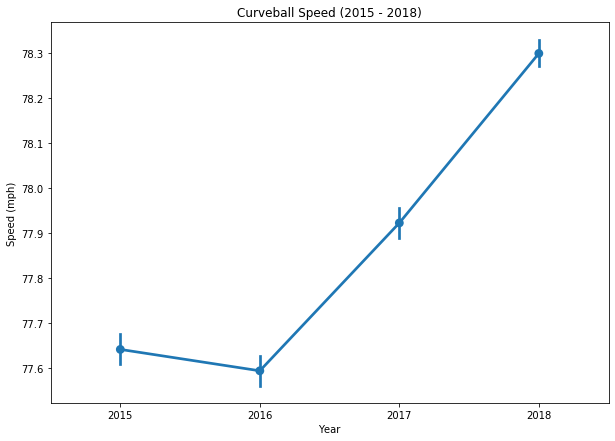

In [13]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="start_speed", data=pitches_cu)
plt.title("Curveball Speed (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Speed (mph)')
plt.show()

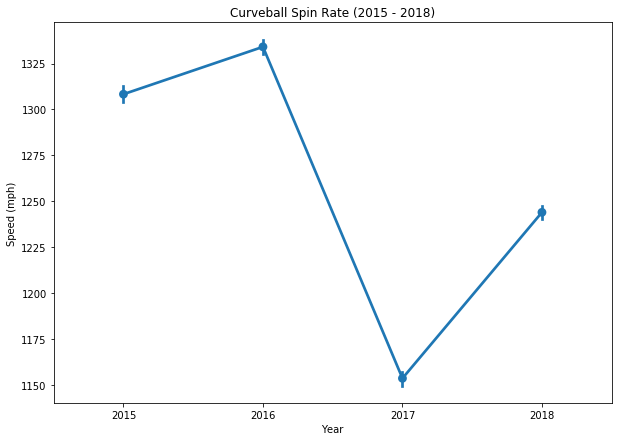

In [14]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="spin_rate", data=pitches_cu)
plt.title("Curveball Spin Rate (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Speed (mph)')
plt.show()



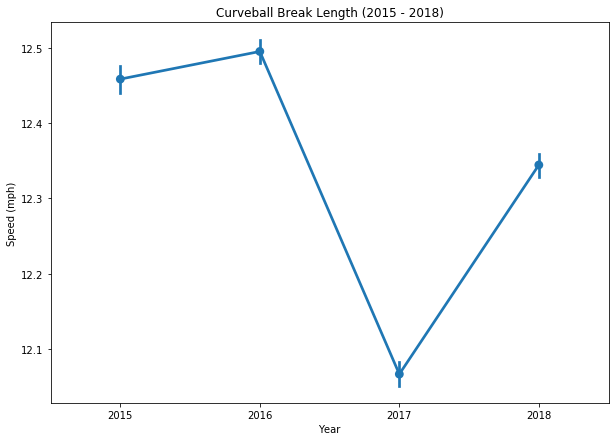

In [15]:
plt.figure(figsize = (10,7))
sns.pointplot(x="year", y="break_length", data=pitches_cu)
plt.title("Curveball Break Length (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Speed (mph)')
plt.show()


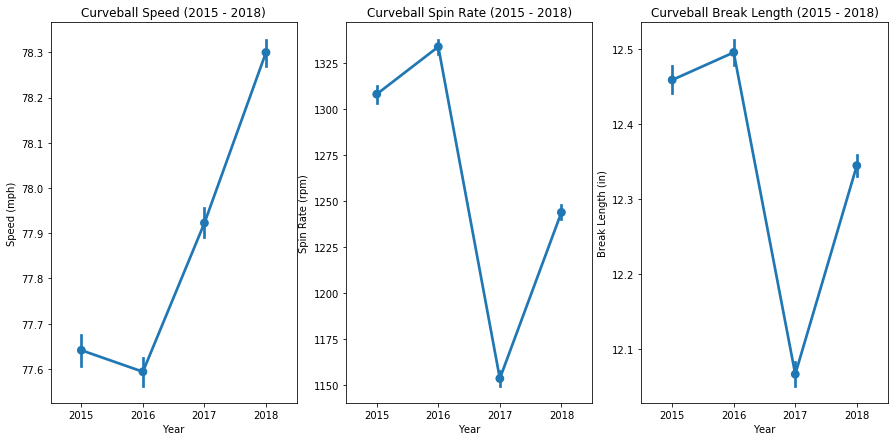

In [16]:
plt.figure(figsize = (15,7))

plt.subplot(1, 3, 1)
sns.pointplot(x="year", y="start_speed", data=pitches_cu)
plt.title("Curveball Speed (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Speed (mph)')

plt.subplot(1, 3, 2)
sns.pointplot(x="year", y="spin_rate", data=pitches_cu)
plt.title("Curveball Spin Rate (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Spin Rate (rpm)')

plt.subplot(1, 3, 3)
sns.pointplot(x="year", y="break_length", data=pitches_cu)
plt.title("Curveball Break Length (2015 - 2018)")
plt.xlabel('Year')
plt.ylabel('Break Length (in)')

plt.show()

## Curveball Conclusion:

Curveballs are getting faster each year, and although there was a significant drop in the break length in 2017, the movement appears to have rebounded slightly in 2018.

# Any Questions?